# Common

In [7]:
import numpy as np
import json
import sys
import os
import h5py
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
rc('font', size=18)

# with open('Zalesak2D/Benchmark/setup.json') as f:
#     data = json.load(f)

# input_path  = "inputs/"
# case_list   = data["exec_list"]

## Get array and dictionaries
Get the 4D array from the error files from cases.

The ranks of 4D array indicates: 
- method
- cfl number
- resolution
- parameters

5 dictionaries are obtained from the 4D array and example usage

- methodcfl['EI']['0.01']
- methodreso['EI']['16']
- paramcfl['cpu']['0.5']
- paramreso['em']['64']
- resocfl['16']['0.01']

In [8]:
def get_4darray(case_path, methods, cfls, resos, params):
    array4d = np.zeros([len(methods),len(cfls),len(resos),len(params)])

    ii = 0 
    for case in methods:
        jj = 0
        for cfl in cfls:
            kk = 0
            for reso in resos:
                f=open(str(case_path + '/cfl_'+str(cfl)+'/'+str(reso)+'/'+case+'/errors.dat'))
                for line in f:
                    if 'cpu' in line:
                        array4d[ii,jj,kk,0] = float(line.split('=')[1])
                    if 'realtive' in line:
                        array4d[ii,jj,kk,1] = float(line.split('=')[1])
                    if 'absolute' in line:
                        array4d[ii,jj,kk,2] = float(line.split('=')[1])
                    if 'conservation' in line:
                        array4d[ii,jj,kk,3] = float(line.split('=')[1])
                kk += 1
            jj +=1
        ii += 1
        
    return array4d

In [9]:
def get_dicts(array4d, methods, cfls, resos, param):
    methodreso = {}
    for i in range(len(methods)):
        r = {}
        for j in range(len(resos)):
            arr = array4d[i,:,j,:]
            pd_arr = pd.DataFrame(
                arr, 
                columns = param,
                index = cfls
                )
            r.update({str(resos[j]):pd_arr})
        methodreso.update({methods[i]:r})

    methodcfl = {}
    for i in range(len(methods)):
        r = {}
        for j in range(len(cfls)):
            arr = array4d[i,j,:,:]
            pd_arr = pd.DataFrame(
                arr, 
                columns = param,
                index = resos
                )
            r.update({str(cfls[j]):pd_arr})
        methodcfl.update({str(methods[i]):r})

    paramreso = {}
    for i in range(len(param)):
        r = {}
        for j in range(len(resos)):
            arr = np.transpose(array4d[:,:,j,i])
            pd_arr = pd.DataFrame(
                arr, 
                columns = methods,
                index = cfls
                )
            r.update({str(resos[j]):pd_arr})
        paramreso.update({str(param[i]):r})

    paramcfl = {}
    for i in range(len(param)):
        r = {}
        for j in range(len(cfls)):
            arr = np.transpose(array4d[:,j,:,i])
            pd_arr = pd.DataFrame(
                arr, 
                columns = methods,
                index = resos
                )
            r.update({str(cfls[j]):pd_arr})
        paramcfl.update({str(param[i]):r})

    resocfl = {}
    for i in range(len(methods)):
        r = {}
        for j in range(len(param)):
            arr = np.transpose(array4d[:,j,i,:])
            pd_arr = pd.DataFrame(
                arr, 
                columns = methods,
                index = param
                )
            r.update({str(cfls[j]):pd_arr})
        resocfl.update({str(resos[i]):r})

#     method3d = {
#         "EI":array4d[0,:,:,:],
#         "LE":array4d[1,:,:,:],
#         "LEEI2D":array4d[2,:,:,:],
#         "EILE2D":array4d[3,:,:,:],
#         "WY":array4d[4,:,:,:],
#     }
#     param3d = {
#         "cpu":array4d[:,:,:,0],
#         "er":array4d[:,:,:,1],
#         "eg":array4d[:,:,:,2],
#         "em":array4d[:,:,:,3],
#     }
    return methodcfl, methodreso, paramcfl, paramreso, resocfl

## plot functions

In [10]:
def plot_param_cfl(f,ax):
    x=f['EI'].keys()
    x=[float(i) for i in x]
    f2=f.to_numpy()
    style = ['-s','->','-*','-X','-D','-o']
    i = 0
    for me in f:
        ax.plot(x,np.abs(f[me].to_numpy()),style[i],markersize=10,
                fillstyle='none',label=me)
        i+=1
    ax.set_yscale('log')
    ax.set_aspect('auto')
    ax.set_xlabel(r'$\rm{CFL}$')
    ax.legend()

def plot_param_grid(f,ax):
    x=f['EI'].keys()
    x=[float(i) for i in x]
    style = ['-s','->','-*','-X','-D','-o']
    i = 0
    f2=f.to_numpy()
    for me in f:
        ax.plot(x,np.abs(f[me].to_numpy()),style[i],markersize=10,
                fillstyle='none',label=me)
        i+=1
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_aspect('auto')
    ax.set_xlabel(r'$N$')
    ax.legend()


# Zalesak2D

In [11]:
methods = ["EI","LE","LEEI2D","EILE2D","WY"]
params = ["cpu","er","eg","em"]
resos = [16,32,64,128,256]
cfls = [0.05,0.1,0.15,0.2,0.25,0.3,0.5]
case_path_z = 'Zalesak2D'

In [12]:
array4d_z    = get_4darray(case_path_z, methods, cfls, resos, params)
arr_dicts_z  = get_dicts(array4d_z, methods, cfls, resos, params)
methodcfl_z  = arr_dicts_z[0]
methodreso_z = arr_dicts_z[1]
paramcfl_z   = arr_dicts_z[2]
paramreso_z  = arr_dicts_z[3]
resocfl_z    = arr_dicts_z[4]

## $E_g$, CFL=0.05

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


,EI,LE,LEEI2D,EILE2D,WY
16,0.013689,0.013682,0.013666,0.013688,0.013758
32,0.003002,0.003001,0.003001,0.003002,0.003002
64,0.001135,0.001133,0.001133,0.001136,0.001135
128,0.000538,0.000519,0.000536,0.000534,0.000539
256,0.000320,0.000334,0.000337,0.000322,0.000322


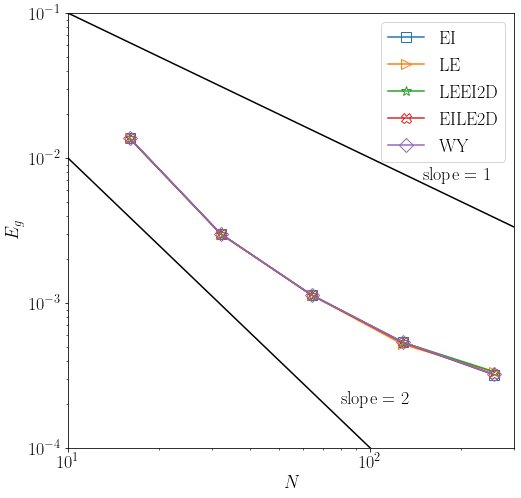

In [7]:
f1_zeg = paramcfl_z['eg']['0.05']
fig_zeg = plt.figure(figsize=[8,8])
ax1_zeg = fig_zeg.add_subplot(111) 
plot_param_grid(f1_zeg,ax1_zeg)
ax1_zeg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [1e0,0.001]
ax1_zeg.plot(xx1,yy1,'k')
ax1_zeg.plot(xx1,yy2,'k')
ax1_zeg.text(80,0.0002,'slope = 2')
ax1_zeg.text(150,0.007,'slope = 1')

ax1_zeg.set_aspect('auto')
# x, y range

ax1_zeg.set_ylim([0.0001,0.1])
ax1_zeg.set_xlim([10,300])
ax1_zeg.set_ylim([0.0001,0.1])
plt.savefig('plots/zalesak2d-eg-cfl005.pdf',box_inches='tight', pad_inches = 0)
f1_zeg

## $E_g$, CFL=0.5

,EI,LE,LEEI2D,EILE2D,WY
16,0.011027,0.010985,0.010958,0.011044,0.010983
32,0.002702,0.002702,0.002702,0.002702,0.002702
64,0.001061,0.001061,0.001061,0.001061,0.001061
128,0.000383,0.000383,0.000383,0.000383,0.000383
256,0.000146,0.000146,0.000146,0.000146,0.000146


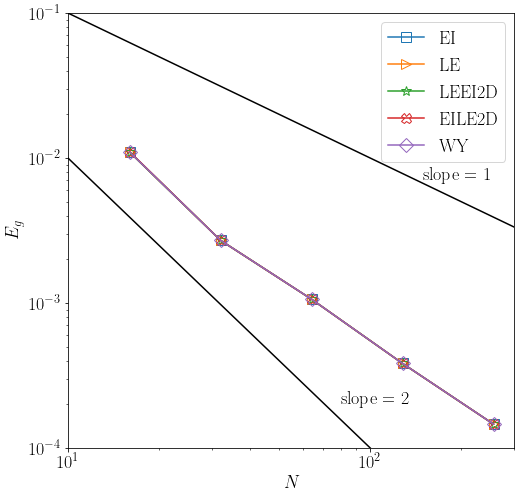

In [8]:
fig_zeg = plt.figure(figsize=[8,8])
f2_zeg = paramcfl_z['eg']['0.5']
ax2_zeg = fig_zeg.add_subplot(111)
plot_param_grid(f2_zeg,ax2_zeg)
ax2_zeg.set_ylabel(r'$E_g$')
xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [1e0,0.001]
ax2_zeg.plot(xx1,yy1,'k')
ax2_zeg.plot(xx1,yy2,'k')
ax2_zeg.text(80,0.0002,'slope = 2')
ax2_zeg.text(150,0.007,'slope = 1')
ax2_zeg.set_xlim([10,300])
ax2_zeg.set_ylim([0.0001,0.1])
ax2_zeg.set_xlim([10,300])
ax2_zeg.set_xlim([10,300])
plt.savefig('plots/zalesak2d-eg-cfl05.pdf',box_inches='tight', pad_inches = 0)
f2_zeg

## $E_g$, N=16

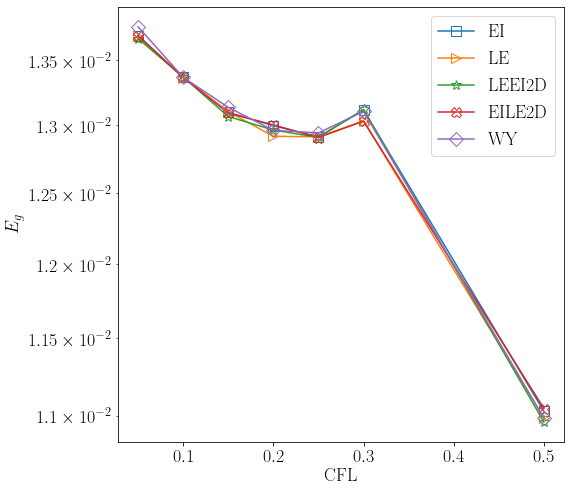

In [9]:
f1_zeg = paramreso_z['eg']['16']
fig_zeg = plt.figure(figsize=[8,8])
ax1_zeg = fig_zeg.add_subplot(111) 
plot_param_cfl(f1_zeg,ax1_zeg)
ax1_zeg.set_ylabel(r'$E_g$')
plt.savefig('plots/zalesak2d-eg-n16.pdf',box_inches='tight', pad_inches = 0)

## $E_g$, N=64

,EI,LE,LEEI2D,EILE2D,WY
0.05,0.001135,0.001133,0.001133,0.001136,0.001135
0.10,0.001125,0.001125,0.001125,0.001125,0.001125
0.15,0.001118,0.001118,0.001118,0.001118,0.001118
0.20,0.001112,0.001111,0.001112,0.001111,0.001111
0.25,0.001105,0.001105,0.001105,0.001105,0.001105
0.30,0.001097,0.001097,0.001097,0.001097,0.001097
0.50,0.001061,0.001061,0.001061,0.001061,0.001061


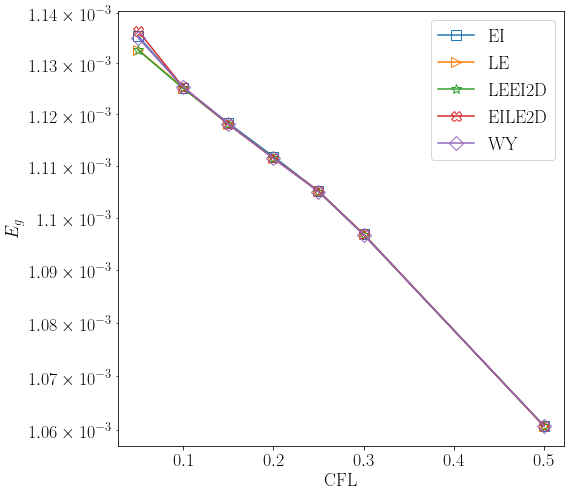

In [10]:
f2_zeg = paramreso_z['eg']['64']
fig_zeg = plt.figure(figsize=[8,8])
ax2_zeg = fig_zeg.add_subplot(111)
plot_param_cfl(f2_zeg,ax2_zeg)
ax2_zeg.set_ylabel(r'$E_g$')
plt.savefig('plots/zalesak2d-eg-n64.pdf',box_inches='tight', pad_inches = 0)
f2_zeg

## E_m

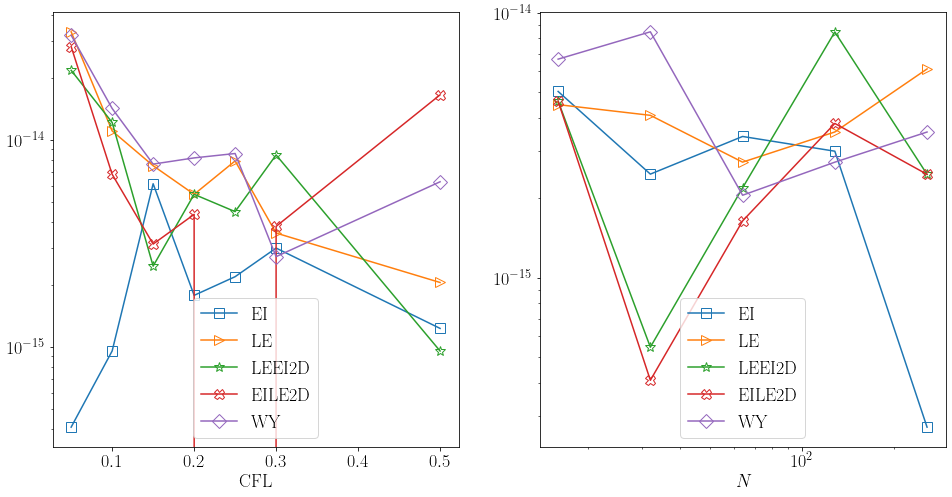

In [11]:
f1_zem = paramreso_z['em']['128']
f2_zem = paramcfl_z['em']['0.3']
# x=cfls
fig_zem = plt.figure(figsize=[16,8])
ax1_zem = fig_zem.add_subplot(121)
plot_param_cfl(f1_zem,ax1_zem)
ax2_zem = fig_zem.add_subplot(122)
plot_param_grid(f2_zem,ax2_zem)

# Single Vortex 2D

In [13]:
methods = ["EI","LE","LEEI2D","EILE2D","WY"]
params = ["cpu","er","eg","em"]
resos = [16,32,64,128,256]
cfls = [0.05,0.1,0.15,0.2,0.25,0.3,0.5,0.8,1.0]
# cfls = [0.05,0.1,0.15,0.2]
case_path_s = 'SingleVortex2D'

In [14]:
array4d_s    = get_4darray(case_path_s, methods, cfls, resos, params)
arr_dicts_s  = get_dicts(array4d_s, methods, cfls, resos, params)
methodcfl_s  = arr_dicts_s[0]
methodreso_s = arr_dicts_s[1]
paramcfl_s   = arr_dicts_s[2]
paramreso_s  = arr_dicts_s[3]
resocfl_s    = arr_dicts_s[4]

## $E_g$, CFL=0.05

,EI,LE,LEEI2D,EILE2D,WY
16,0.079251,0.063909,0.068214,0.061470,0.080361
32,0.031093,0.032310,0.032017,0.040021,0.031177
64,0.008076,0.009277,0.008675,0.009286,0.011110
128,0.003642,0.004389,0.003202,0.003680,0.003370
256,0.001045,0.001127,0.001047,0.000941,0.001355


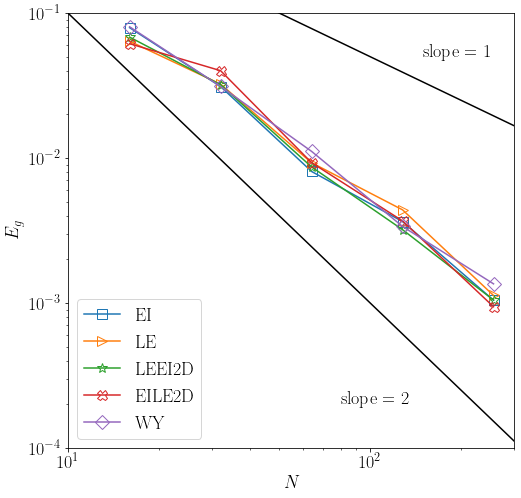

In [15]:
f1_seg = paramcfl_s['eg']['0.05']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_grid(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e1,1e-5]
yy2 = [5e0,0.005]
ax1_seg.plot(xx1,yy1,'k')
ax1_seg.plot(xx1,yy2,'k')
ax1_seg.text(80,0.0002,'slope = 2')
ax1_seg.text(150,0.05,'slope = 1')

ax1_seg.set_aspect('auto')
# x, y range

ax1_seg.set_ylim([0.0001,0.1])
ax1_seg.set_xlim([10,300])
ax1_seg.set_ylim([0.0001,0.1])
plt.savefig('plots/sv2d-eg-cfl005.pdf',box_inches='tight', pad_inches = 0)
f1_seg

## $E_m$, CFL=0.05

,EI,LE,LEEI2D,EILE2D,WY
16,0.011890,-0.012332,-0.000367,5.850585e-14,1.240795e-13
32,0.005420,-0.005402,-0.000124,2.621006e-13,2.126254e-13
64,0.002700,-0.002680,0.000005,3.211968e-13,3.194298e-13
128,0.001351,-0.001341,0.000008,2.236205e-13,2.927289e-13
256,0.000676,-0.000672,0.000003,3.581069e-13,3.149142e-13


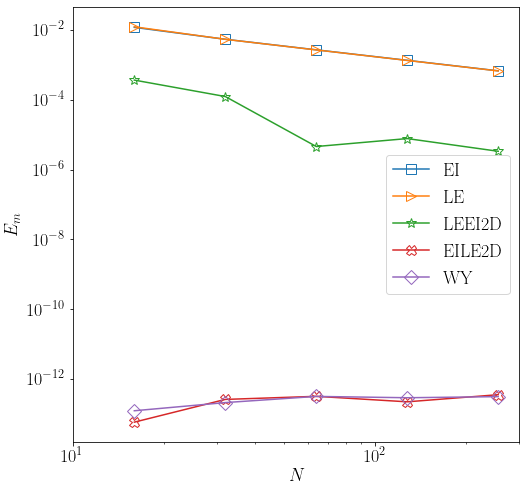

In [32]:
fig_seg = plt.figure(figsize=[8,8])
f2_seg = paramcfl_s['em']['0.05']
plot_param_cfl(f2_seg,ax1_seg)
ax2_seg = fig_seg.add_subplot(111)
ax2_seg.set_ylabel(r'$E_m$')
plot_param_grid(f2_seg,ax2_seg)
ax2_seg.set_xlim([10,300])
plt.savefig('plots/sv2d-em-cfl005.pdf',box_inches='tight', pad_inches = 0)
f2_seg

## $E_g$, CFL=1.0

,EI,LE,LEEI2D,EILE2D,WY
16,0.079922,0.058495,0.076827,0.077172,0.081629
32,0.054836,0.036091,0.031333,0.030402,0.040223
64,0.026392,0.021349,0.008468,0.008825,0.017865
128,0.012222,0.010318,0.002829,0.002976,0.009517
256,0.006121,0.005054,0.001245,0.001269,0.004587


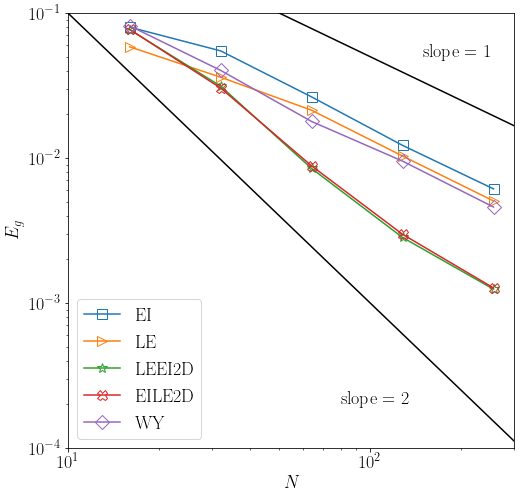

In [19]:
f1_seg = paramcfl_s['eg']['1.0']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_grid(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e1,1e-5]
yy2 = [5e0,0.005]
ax1_seg.plot(xx1,yy1,'k')
ax1_seg.plot(xx1,yy2,'k')
ax1_seg.text(80,0.0002,'slope = 2')
ax1_seg.text(150,0.05,'slope = 1')

ax1_seg.set_aspect('auto')
# x, y range

ax1_seg.set_ylim([0.0001,0.1])
ax1_seg.set_xlim([10,300])
ax1_seg.set_ylim([0.0001,0.1])
plt.savefig('plots/sv2d-eg-cfl10.pdf',box_inches='tight', pad_inches = 0)
f1_seg

## $E_m$, CFL=1.0

,EI,LE,LEEI2D,EILE2D,WY
16,0.232084,-0.202426,-0.021328,3.730239e-15,8.638448e-15
32,0.107067,-0.095560,-0.001478,1.060182e-14,1.236879e-14
64,0.053524,-0.049337,-0.000054,5.889916e-15,1.629543e-14
128,0.026939,-0.025770,0.000068,1.138717e-14,1.904406e-14
256,0.013496,-0.013171,0.000051,9.620196e-15,2.081104e-14


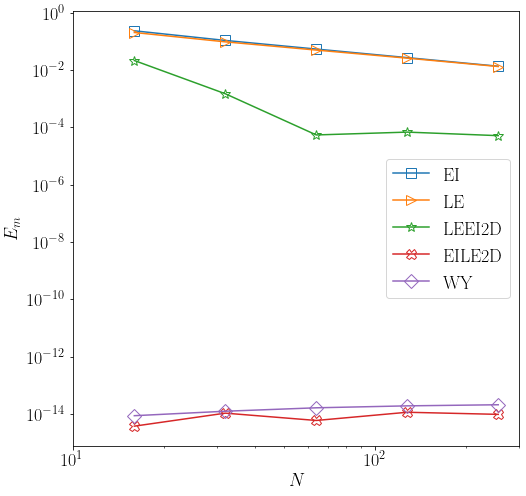

In [33]:
fig_seg = plt.figure(figsize=[8,8])
f2_seg = paramcfl_s['em']['1.0']
plot_param_cfl(f2_seg,ax1_seg)
ax2_seg = fig_seg.add_subplot(111)
ax2_seg.set_ylabel(r'$E_m$')
plot_param_grid(f2_seg,ax2_seg)
ax2_seg.set_xlim([10,300])
plt.savefig('plots/sv2d-em-cfl10.pdf',box_inches='tight', pad_inches = 0)
f2_seg

## $E_g$, N=64

,EI,LE,LEEI2D,EILE2D,WY
0.05,0.008076,0.009277,0.008675,0.009286,0.011110
0.10,0.008512,0.007879,0.008078,0.007682,0.009460
0.15,0.008352,0.007683,0.007182,0.006450,0.009510
0.20,0.009125,0.008494,0.006185,0.007194,0.009690
0.25,0.010069,0.009463,0.006389,0.007160,0.010151
0.30,0.011555,0.009963,0.006417,0.006660,0.010665
0.50,0.015199,0.013288,0.007013,0.007225,0.012224
0.80,0.022150,0.018072,0.007627,0.008015,0.015925
1.00,0.026392,0.021349,0.008468,0.008825,0.017865


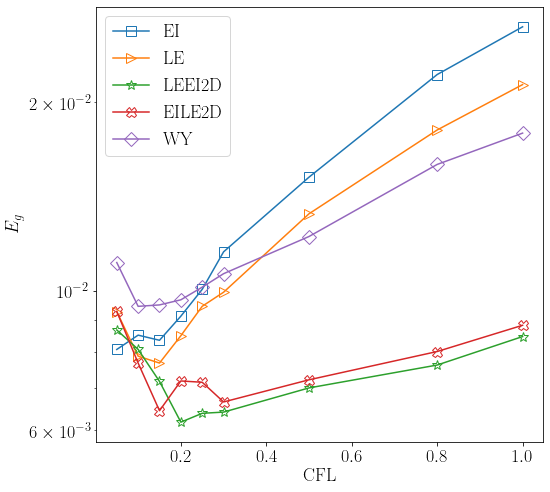

In [29]:
f1_seg = paramreso_s['eg']['64']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_cfl(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_g$')
plt.savefig('plots/sv2d-eg-n64.pdf',box_inches='tight', pad_inches = 0)
f1_seg

## $E_m$ N=64

,EI,LE,LEEI2D,EILE2D,WY
0.05,0.002700,-0.002680,0.000005,3.211968e-13,3.194298e-13
0.10,0.005395,-0.005332,0.000022,1.372350e-13,1.560828e-13
0.15,0.008086,-0.007971,0.000030,9.129370e-14,1.070001e-13
0.20,0.010776,-0.010586,0.000029,5.300925e-14,8.010286e-14
0.25,0.013464,-0.013184,0.000027,4.711933e-14,6.518174e-14
0.30,0.016143,-0.015762,0.000026,1.079818e-14,5.418723e-14
0.50,0.026874,-0.025791,0.000021,2.316700e-14,3.200188e-14
0.80,0.042904,-0.040212,-0.000096,1.511745e-14,2.179269e-14
1.00,0.053524,-0.049337,-0.000054,5.889916e-15,1.629543e-14


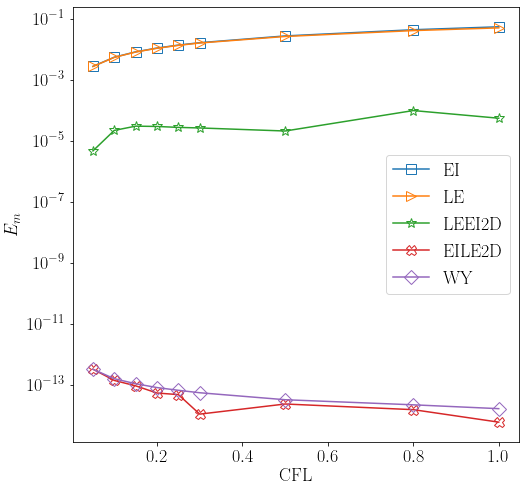

In [36]:
f1_seg = paramreso_s['em']['64']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_cfl(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_m$')
plt.savefig('plots/sv2d-em-n64.pdf',box_inches='tight', pad_inches = 0)
f1_seg

# Reverse Vortex 2D

In [23]:
methods = ["EI","LE","LEEI2D","EILE2D","WY"]
params = ["cpu","er","eg","em"]
resos = [16,32,64,128,256]
cfls = [0.05,0.1,0.15,0.2,0.25,0.3,0.5,0.8,1.0]
case_path_r = 'ReverseVortex2D'

In [24]:
array4d_r    = get_4darray(case_path_r, methods, cfls, resos, params)
arr_dicts_r  = get_dicts(array4d_r, methods, cfls, resos, params)
methodcfl_r  = arr_dicts_r[0]
methodreso_r = arr_dicts_r[1]
paramcfl_r   = arr_dicts_r[2]
paramreso_r  = arr_dicts_r[3]
resocfl_r    = arr_dicts_r[4]

## $E_g$, CFL=0.05

,EI,LE,LEEI2D,EILE2D,WY
16,0.018026,0.015156,0.016228,0.015658,0.022383
32,0.009126,0.007081,0.007553,0.007640,0.007658
64,0.006960,0.006407,0.006117,0.006274,0.005877
128,0.005669,0.005447,0.005408,0.005451,0.005548
256,0.001869,0.001762,0.001746,0.001806,0.002047


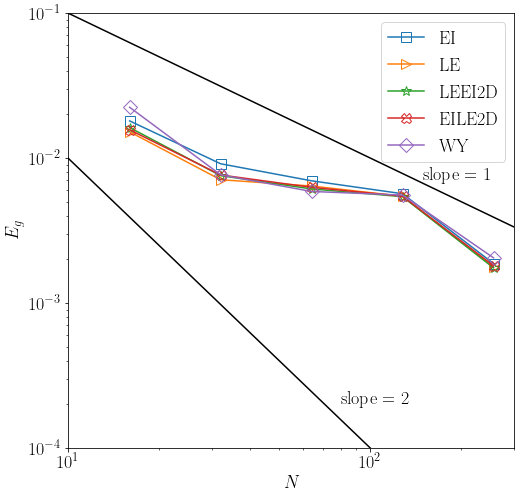

In [25]:
f1_reg = paramcfl_r['eg']['0.05']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_grid(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [1e0,0.001]
ax1_reg.plot(xx1,yy1,'k')
ax1_reg.plot(xx1,yy2,'k')
ax1_reg.text(80,0.0002,'slope = 2')
ax1_reg.text(150,0.007,'slope = 1')

ax1_reg.set_aspect('auto')
# x, y range

ax1_reg.set_ylim([0.0001,0.1])
ax1_reg.set_xlim([10,300])
ax1_reg.set_ylim([0.0001,0.1])
plt.savefig('plots/rv2d-eg-cfl005.pdf',box_inches='tight', pad_inches = 0)
f1_reg

## $E_g$ , CFL=1.0

,EI,LE,LEEI2D,EILE2D,WY
16,0.087166,0.027090,0.013081,0.032421,0.044372
32,0.050105,0.022901,0.008722,0.013178,0.027498
64,0.026451,0.014727,0.007130,0.010247,0.014277
128,0.015856,0.009323,0.006199,0.007568,0.008694
256,0.006493,0.004865,0.002090,0.002354,0.003676


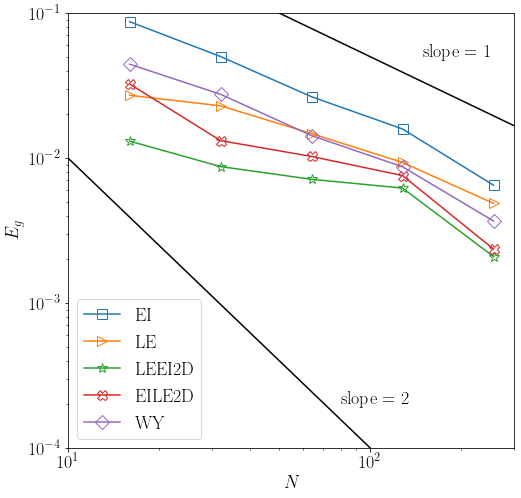

In [28]:
f1_reg = paramcfl_r['eg']['1.0']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_grid(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [5e0,0.005]
ax1_reg.plot(xx1,yy1,'k')
ax1_reg.plot(xx1,yy2,'k')
ax1_reg.text(80,0.0002,'slope = 2')
ax1_reg.text(150,0.05,'slope = 1')
ax1_reg.set_xlim([10,300])
ax1_reg.set_ylim([0.0001,0.1])

ax1_reg.set_aspect('auto')
# x, y range

ax1_reg.set_ylim([0.0001,0.1])
ax1_reg.set_xlim([10,300])
ax1_reg.set_ylim([0.0001,0.1])
plt.savefig('plots/rv2d-eg-cfl10.pdf',box_inches='tight', pad_inches = 0)
f1_reg

## $E_m$, CFL=0.05

,EI,LE,LEEI2D,EILE2D,WY
16,0.002606,-0.002338,0.001924,5.889851e-15,1.492096e-14
32,-0.003342,0.003275,0.000742,1.649172e-14,3.455408e-14
64,-0.001901,0.001772,-0.000011,1.629543e-14,1.060185e-14
128,-0.000991,0.000966,0.000012,1.629544e-14,1.982939e-14
256,-0.000526,0.000549,0.000035,2.748627e-14,3.298353e-14


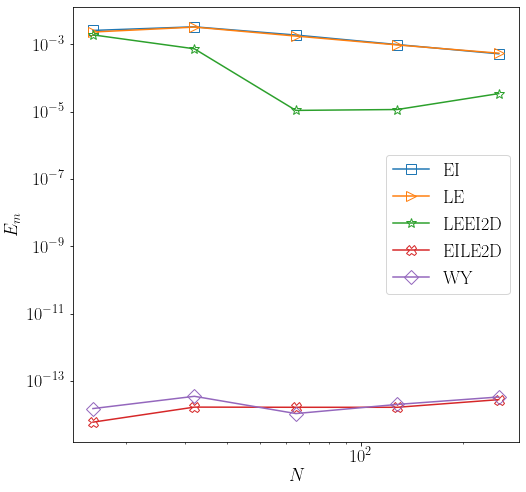

In [34]:
fig_reg = plt.figure(figsize=[8,8])
f2_reg = paramcfl_r['em']['0.05']
plot_param_cfl(f1_reg,ax1_reg)
ax2_reg = fig_reg.add_subplot(111)
ax2_reg.set_ylabel(r'$E_m$')
plot_param_grid(f2_reg,ax2_reg)
plt.savefig('plots/rv2d-em-cfl005.pdf',box_inches='tight', pad_inches = 0)
f2_reg

## $E_m$, CFL=1.0

,EI,LE,LEEI2D,EILE2D,WY
16,-0.613214,-0.148880,-0.062557,9.816418e-16,-0.003226
32,-0.194104,-0.015214,-0.008399,1.963300e-15,0.002043
64,-0.067534,0.011539,-0.004569,1.963305e-15,0.001267
128,-0.026518,0.011578,-0.000768,1.963306e-16,0.000241
256,-0.012762,0.008581,0.000337,1.766975e-15,0.000185


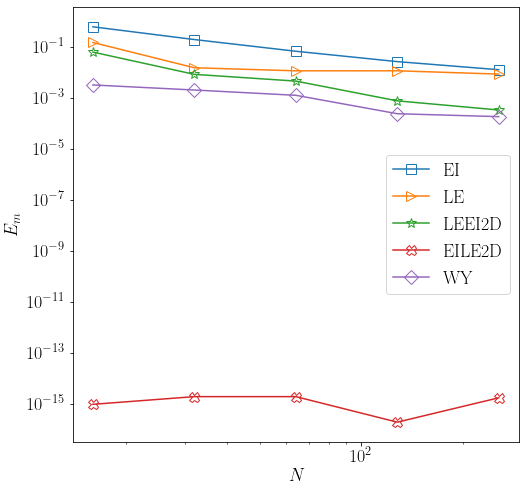

In [35]:
fig_reg = plt.figure(figsize=[8,8])
f2_reg = paramcfl_r['em']['1.0']
plot_param_cfl(f1_reg,ax1_reg)
ax2_reg = fig_reg.add_subplot(111)
ax2_reg.set_ylabel(r'$E_m$')
plot_param_grid(f2_reg,ax2_reg)
plt.savefig('plots/rv2d-em-cfl10.pdf',box_inches='tight', pad_inches = 0)
f2_reg

## $E_g$, N=64

,EI,LE,LEEI2D,EILE2D,WY
0.05,0.006960,0.006407,0.006117,0.006274,0.005877
0.10,0.008028,0.006970,0.006308,0.006553,0.006024
0.15,0.008783,0.007381,0.005921,0.006448,0.006217
0.20,0.009926,0.006816,0.006371,0.006705,0.006692
0.25,0.010951,0.007602,0.006473,0.007347,0.007091
0.30,0.012206,0.007300,0.006543,0.007849,0.007795
0.50,0.015676,0.009407,0.006464,0.008087,0.009100
0.80,0.022493,0.012615,0.006383,0.009106,0.011788
1.00,0.026451,0.014727,0.007130,0.010247,0.014277


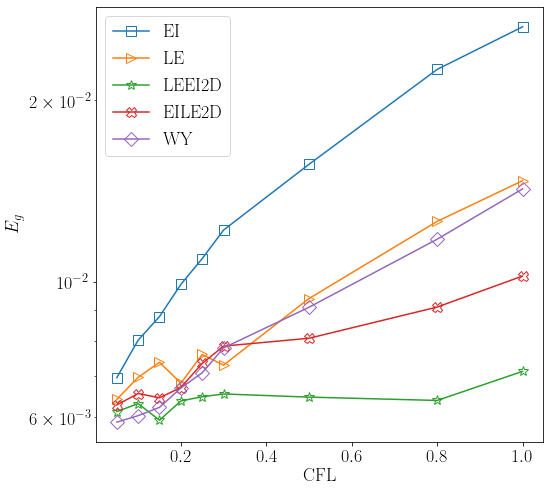

In [30]:
f1_reg = paramreso_r['eg']['64']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_cfl(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_g$')
plt.savefig('plots/rv2d-eg-n64.pdf',box_inches='tight', pad_inches = 0)
f1_reg

## $E_m$, N=64

,EI,LE,LEEI2D,EILE2D,WY
0.05,-0.001901,0.001772,-0.000011,1.629543e-14,1.060185e-14
0.10,-0.004010,0.003350,-0.000140,-5.104594e-15,6.675238e-15
0.15,-0.006101,0.004788,-0.000086,-3.965877e-14,5.104594e-15
0.20,-0.008472,0.006652,-0.000280,4.711933e-15,5.693586e-15
0.25,-0.010832,0.007905,-0.000523,5.497255e-15,5.104594e-15
0.30,-0.013718,0.009328,-0.000407,3.730280e-15,5.104594e-15
0.50,-0.025790,0.012276,-0.000980,2.748628e-15,3.926611e-15
0.80,-0.047130,0.013314,-0.002722,7.853222e-16,-2.327431e-05
1.00,-0.067534,0.011539,-0.004569,1.963305e-15,1.267148e-03


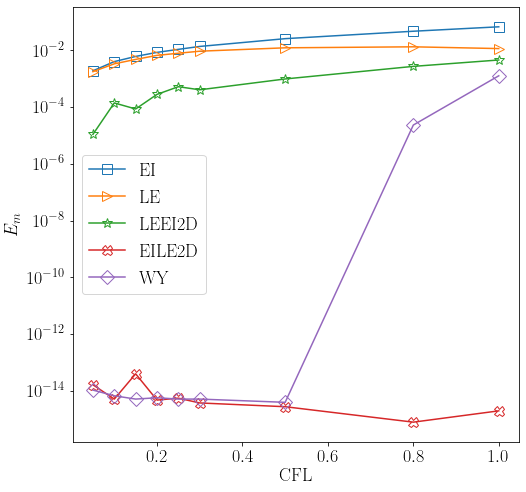

In [37]:
f1_reg = paramreso_r['em']['64']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_cfl(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_m$')
plt.savefig('plots/rv2d-em-n64.pdf',box_inches='tight', pad_inches = 0)
f1_reg